In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
x = [1, 3, 5]
y = [2, 4]

In [22]:
np.dot(np.array(x).reshape(3, 1), np.array(y).reshape(1, 2))

array([[ 2,  4],
       [ 6, 12],
       [10, 20]])

In [4]:
X, Y = np.meshgrid(x, y)

In [7]:
df = pd.DataFrame(X * Y, columns=x, index=y)
df

,1,3,5
2,2,6,10
4,4,12,20


In [8]:
mean = 178
qs = np.arange(mean - 24, mean + 24, 0.5)
qs

array([154. , 154.5, 155. , 155.5, 156. , 156.5, 157. , 157.5, 158. ,
       158.5, 159. , 159.5, 160. , 160.5, 161. , 161.5, 162. , 162.5,
       163. , 163.5, 164. , 164.5, 165. , 165.5, 166. , 166.5, 167. ,
       167.5, 168. , 168.5, 169. , 169.5, 170. , 170.5, 171. , 171.5,
       172. , 172.5, 173. , 173.5, 174. , 174.5, 175. , 175.5, 176. ,
       176.5, 177. , 177.5, 178. , 178.5, 179. , 179.5, 180. , 180.5,
       181. , 181.5, 182. , 182.5, 183. , 183.5, 184. , 184.5, 185. ,
       185.5, 186. , 186.5, 187. , 187.5, 188. , 188.5, 189. , 189.5,
       190. , 190.5, 191. , 191.5, 192. , 192.5, 193. , 193.5, 194. ,
       194.5, 195. , 195.5, 196. , 196.5, 197. , 197.5, 198. , 198.5,
       199. , 199.5, 200. , 200.5, 201. , 201.5])

In [9]:
std = 7.7
ps = ss.norm(mean, std).pdf(qs)
ps

array([0.00040257, 0.00049184, 0.00059838, 0.00072494, 0.00087456,
       0.00105062, 0.00125682, 0.00149717, 0.00177597, 0.00209782,
       0.00246758, 0.0028903 , 0.00337118, 0.00391553, 0.00452865,
       0.00521572, 0.00598177, 0.00683146, 0.00776901, 0.00879807,
       0.0099215 , 0.0111413 , 0.01245844, 0.01387267, 0.01538244,
       0.01698475, 0.01867505, 0.02044717, 0.02229325, 0.02420373,
       0.02616737, 0.02817128, 0.03020104, 0.03224081, 0.03427353,
       0.0362811 , 0.03824466, 0.04014486, 0.04196216, 0.04367717,
       0.04527099, 0.04672553, 0.04802388, 0.04915062, 0.05009213,
       0.05083687, 0.0513756 , 0.05170157, 0.05181069, 0.05170157,
       0.0513756 , 0.05083687, 0.05009213, 0.04915062, 0.04802388,
       0.04672553, 0.04527099, 0.04367717, 0.04196216, 0.04014486,
       0.03824466, 0.0362811 , 0.03427353, 0.03224081, 0.03020104,
       0.02817128, 0.02616737, 0.02420373, 0.02229325, 0.02044717,
       0.01867505, 0.01698475, 0.01538244, 0.01387267, 0.01245

In [10]:
prior = Pmf(ps, qs)
prior.normalize()

1.9963309462450582

In [23]:
def make_joint(pmf1, pmf2):
    X, Y = np.meshgrid(pmf1, pmf2)
    return pd.DataFrame(X * Y, columns=pmf1.qs, index=pmf2.qs)

In [24]:
joint = make_joint(prior, prior)

In [26]:
joint.sum().sum()

1.0

In [33]:
def plot_joint(joint, cmap='Blues'):
    vmax = joint.to_numpy().max() * 1.1
    plt.pcolormesh(joint.columns, joint.index, joint, cmap=cmap, vmax=vmax, shading='nearest')
    plt.colorbar()
    plt.xlabel('A height')
    plt.ylabel('B height')

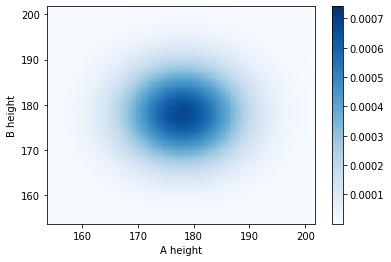

In [34]:
plot_joint(joint)

In [35]:
x = joint.columns
y = joint.index
X, Y = np.meshgrid(x, y)

In [39]:
X, Y

(array([[154. , 154.5, 155. , ..., 200.5, 201. , 201.5],
        [154. , 154.5, 155. , ..., 200.5, 201. , 201.5],
        [154. , 154.5, 155. , ..., 200.5, 201. , 201.5],
        ...,
        [154. , 154.5, 155. , ..., 200.5, 201. , 201.5],
        [154. , 154.5, 155. , ..., 200.5, 201. , 201.5],
        [154. , 154.5, 155. , ..., 200.5, 201. , 201.5]]),
 array([[154. , 154. , 154. , ..., 154. , 154. , 154. ],
        [154.5, 154.5, 154.5, ..., 154.5, 154.5, 154.5],
        [155. , 155. , 155. , ..., 155. , 155. , 155. ],
        ...,
        [200.5, 200.5, 200.5, ..., 200.5, 200.5, 200.5],
        [201. , 201. , 201. , ..., 201. , 201. , 201. ],
        [201.5, 201.5, 201.5, ..., 201.5, 201.5, 201.5]]))

In [41]:
A_taller = (X > Y)
A_taller

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [42]:
a = np.where(A_taller, 1, 0)
a

array([[0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
likelihood = pd.DataFrame(a, index=x, columns=y)

In [46]:
posterior = joint * likelihood
posterior.sum().sum()

0.4908074782152697

In [47]:
joint.to_numpy().sum()

1.0

In [48]:
def normalize(joint):
    prob_data = joint.to_numpy().sum()
    joint /= prob_data
    return prob_data

In [49]:
normalize(posterior)

0.49080747821526977

In [50]:
columns_sums = posterior.sum(axis=0)
columns_sums

154.0    0.000000e+00
154.5    1.012260e-07
155.0    2.736152e-07
155.5    5.532519e-07
156.0    9.915650e-07
             ...     
199.5    1.070260e-03
200.0    8.913732e-04
200.5    7.391972e-04
201.0    6.103756e-04
201.5    5.018515e-04
Length: 96, dtype: float64

In [55]:
marginal_A = Pmf(columns_sums)
marginal_A

,probs
154.0,0.000000e+00
154.5,1.012260e-07
155.0,2.736152e-07
155.5,5.532519e-07
156.0,9.915650e-07
...,...
199.5,1.070260e-03
200.0,8.913732e-04
200.5,7.391972e-04
201.0,6.103756e-04


In [56]:
row_sums = posterior.sum(axis=1)
marginal_B = Pmf(row_sums)

In [57]:
def marginal(joint, axis):
    return Pmf(joint.sum(axis=axis))

In [58]:
column_170 = posterior[170]
column_170

154.0    0.000006
154.5    0.000008
155.0    0.000009
155.5    0.000011
156.0    0.000014
           ...   
199.5    0.000000
200.0    0.000000
200.5    0.000000
201.0    0.000000
201.5    0.000000
Name: 170.0, Length: 96, dtype: float64

In [59]:
cond_B = Pmf(column_170)
cond_B.normalize()

0.004358061205454471